In [34]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

import numpy as np
import pandas as pd

In [35]:
def bin_data(data, number_of_bins):
    bins = np.linspace(np.min(data), np.max(data), number_of_bins)
    return np.digitize(data, bins)

In [36]:
dataset = pd.read_csv('data/pima-indians-diabetes.csv', skiprows=9)
dataset.head()

times_pregnant  plasma  blood_pressure  skin_thickness  insulin  mass_idx  \
0               6     148              72              35        0      33.6   
1               1      85              66              29        0      26.6   
2               8     183              64               0        0      23.3   
3               1      89              66              23       94      28.1   
4               0     137              40              35      168      43.1   

   pedigree  age  class  
0     0.627   50      1  
1     0.351   31      0  
2     0.672   32      1  
3     0.167   21      0  
4     2.288   33      1

In [37]:
dataset.describe()

times_pregnant      plasma  blood_pressure  skin_thickness     insulin  \
count      768.000000  768.000000      768.000000      768.000000  768.000000   
mean         3.845052  120.894531       69.105469       20.536458   79.799479   
std          3.369578   31.972618       19.355807       15.952218  115.244002   
min          0.000000    0.000000        0.000000        0.000000    0.000000   
25%          1.000000   99.000000       62.000000        0.000000    0.000000   
50%          3.000000  117.000000       72.000000       23.000000   30.500000   
75%          6.000000  140.250000       80.000000       32.000000  127.250000   
max         17.000000  199.000000      122.000000       99.000000  846.000000   

         mass_idx    pedigree         age       class  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

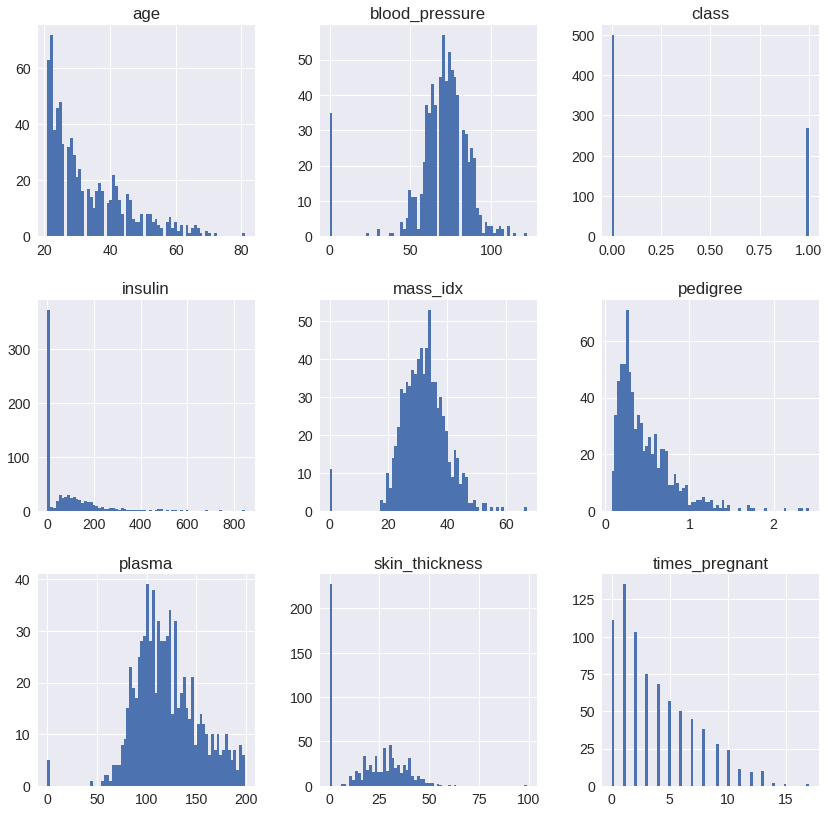

In [38]:
ax = dataset.hist(figsize=(14, 14), bins=70)

In [39]:
# N = 30
# features_to_discretize = ['age', 'pedigree', 'insulin']

# for feature in features_to_discretize:
#     dataset[feature] = bin_data(dataset[feature], N)

In [40]:
# features = 'times_pregnant plasma blood_pressure skin_thickness insulin mass_idx pedigree age'.split()
# dataset = pd.read_csv('data/pima-indians-diabetes.csv', skiprows=9)

# from entropy_splitter import EntropySplitter

# for feature in features:
#     splitter = EntropySplitter(gain_threshold=0.015)
#     splits = splitter.get_splits(dataset[feature], dataset['class'])
#     display(splits)
    
#     if len(splits) > 0:
#         dataset[feature] = np.digitize(dataset[feature], splits)

In [41]:
# features = 'times_pregnant plasma blood_pressure skin_thickness insulin mass_idx pedigree age'.split()

# for feature in features: 
#     dataset[feature] = pd.qcut(dataset[feature].rank(method='first'), 6, labels=False)

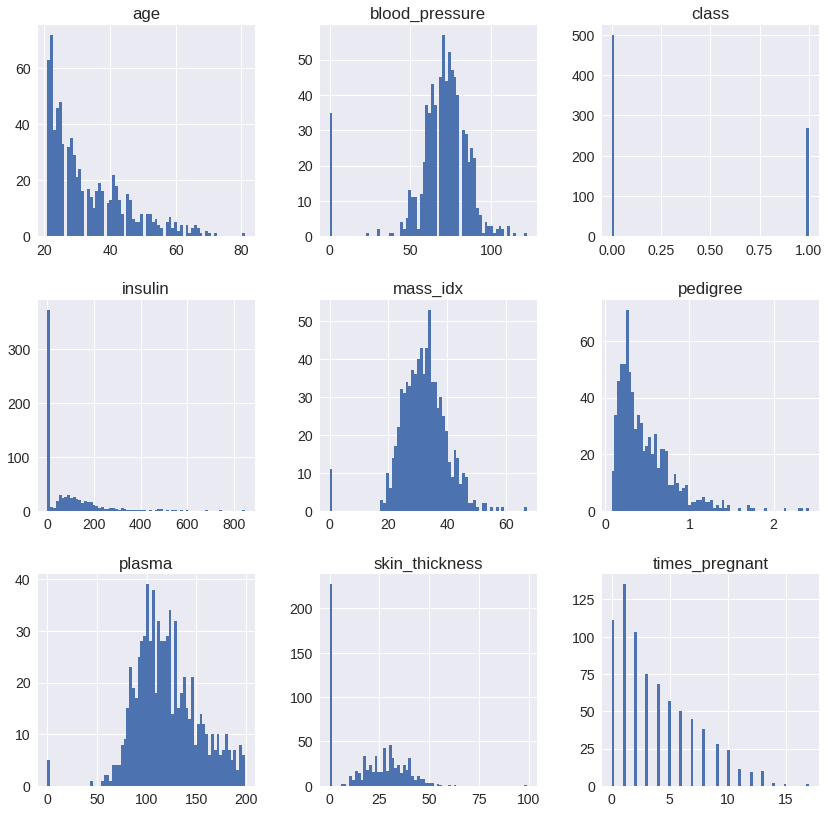

In [42]:
ax = dataset.hist(figsize=(14, 14), bins=70)

In [43]:
X = dataset[features]
y = dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

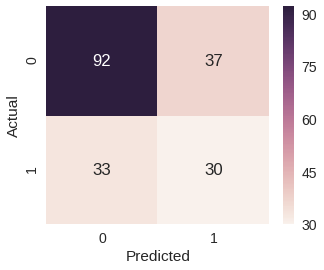

In [44]:
cm = confusion_matrix(y_test, y_pred)

sn.set(font_scale=1.4)

plt.figure(figsize = (5,4))
ax = sn.heatmap(cm, annot=True)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [45]:
def compute_scores_with_cvs_for_metrics(metrics, x, y, cv):
        return {m: np.mean(cross_val_score(clf, x, y, cv=cv, scoring=m, n_jobs=-1)) for m in metrics}

In [46]:
metrics = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro']

compute_scores_with_cvs_for_metrics(metrics, X, y, 10)

{'accuracy': 0.59101161995898832,
 'f1_micro': 0.59101161995898832,
 'precision_micro': 0.59101161995898832,
 'recall_micro': 0.59101161995898832}